/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:85: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:95: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:96: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:98: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


initial number of particles: 9587.0
final number of particles: 9587.0


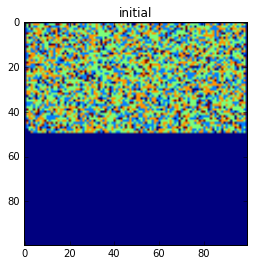

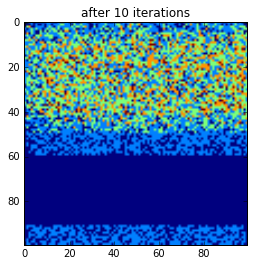

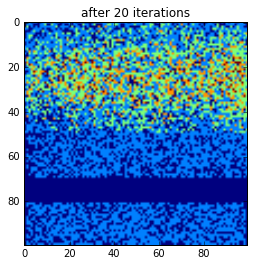

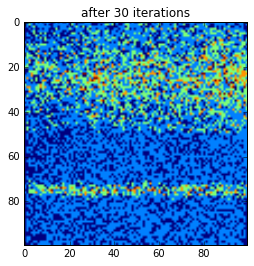

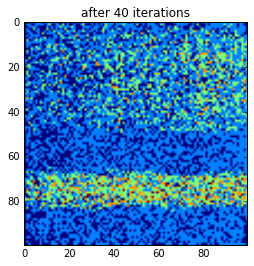

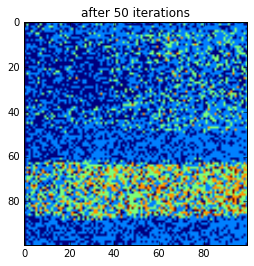

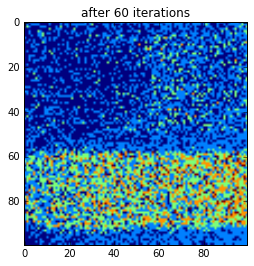

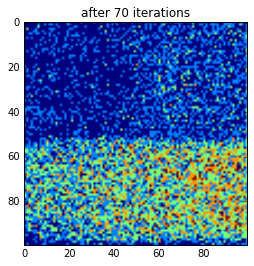

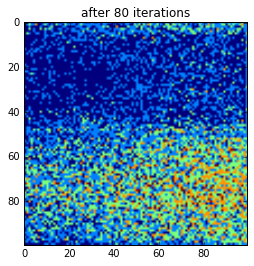

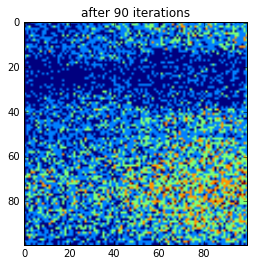

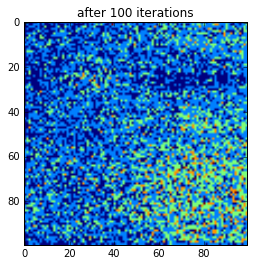

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def density(n):
    c = np.zeros(n.shape)
    c += (n & 0b0001)/0b0001
    c += (n & 0b0010)/0b0010
    c += (n & 0b0100)/0b0100
    c += (n & 0b1000)/0b1000
    return c

def show(n, title):
    plt.figure()
    plt.title(title)
    m = density(n)
#     m[n>0b1111] = -1
#     m[n==0b10001] = 5
#     m[n==0b10010] = 6
#     m[n==0b10011] = 7
    plt.imshow(m)

def collision(nin):
    nout = nin.copy()
    nout[nin==0b10001] = 0b10010
    nout[nin==0b10011] = 0b10110
    nout[nin==0b100010] = 0b100100
    nout[nin==0b100110] = 0b101100
    nout[nin==0b1000100] = 0b1001000
    nout[nin==0b1001100] = 0b1001001
    nout[nin==0b10001000] = 0b10000001
    nout[nin==0b10001001] = 0b10000011

    nout[nin==0b0101]  = 0b1010
    nout[nin==0b1010] = 0b0101

    return nout


def propagation(nin):
    '''
    roll axis 0 vertical
    roll axiy 1 horizontal# or n = np.random.randint(0, 1, [4, nx, ny])

    '''
    n_mask = 0b0001
    e_mask = 0b0010
    s_mask = 0b0100
    w_mask = 0b1000
    
    
    nout = np.zeros(nin.shape,dtype=int)
    
    nout += np.roll(nin, 1, axis=1) & n_mask
    nout += np.roll(nin, 1, axis=0) & e_mask
    nout += np.roll(nin, -1, axis=1) & s_mask
    nout += np.roll(nin, -1, axis=0) & w_mask
    
    nout[(nin & 0b10000) == 0b10000] += 0b10000
    nout[(nin & 0b100000) == 0b100000] += 0b100000
    nout[(nin & 0b1000000) == 0b1000000] += 0b1000000
    nout[(nin & 0b10000000) == 0b10000000] += 0b1000000

    return nout

nx = 100
ny = 100
cx = nx/2
cy = ny/2

w = 10
h = 10


'''
  0        2
3 x 1 => 3 x 1
  2        1

collision 
0101 (10) => 1010
1010 (5)=> 0101# or n = np.random.randint(0, 1, [4, nx, ny])
0b1010
'''
n = np.zeros([nx, ny] , dtype=int)
n[0:cx,:] = np.random.randint(0,16,[cx, ny])

# mask = np.random.randint(0,8,size=n.shape)
# n[mask>0] = 0
# n[cx-w:cx+w,cy-h:cy+h]=np.random.randint(0,16,[w*2,h*2])

n[:,-1] = 0b10000
n[:,0] = 0b100000
n[-1,:] = 0b1000000
n[0,:] = 0b10000000
n[cx,:] = 0b1000000
n[cx+1,:] = 0b10000000
n[cx,cy-h:cy+h] = 0
n[cx+1,cy-h:cy+h] = 0


# n = np.array([
#     [0,0,0],
#     [0,5,0],
#     [0,0,0]
# ])

print('initial number of particles: {}'.format(np.sum(density(n))))

show(n,'initial')
for i in range(0,100):
    n = propagation(collision(n))
    if (i+1)%10==0:
        show(n,'after {} iterations'.format(i+1))

print('final number of particles: {}'.format(np.sum(density(n))))

plt.show()

In [72]:
a= 0b10011
b= 0b10001
(a&b)==b



True